#References

*   https://www.coursera.org/learn/linear-algebra-machine-learning
*   https://github.com/bundickm/CheatSheets 
*   https://en.wikipedia.org/wiki/Matrix_(mathematics)
*   https://en.wikipedia.org/wiki/Transformation_matrix
*   https://en.wikipedia.org/wiki/Gaussian_elimination
*   https://towardsdatascience.com/manually-computing-coefficients-for-an-ols-regression-using-python-50d8e413de
*   https://rpubs.com/aaronsc32/qr-decomposition-gram-schmidt
*   https://web.physics.utah.edu/~detar/lessons/python/numpy_eigen/node1.html
*   https://intuitive-math.club/linear-algebra/eigenbasis/
*   https://programmathically.com/eigenvalue-decomposition/#:~:text=The%20eigenvalue%20decomposition%20or%20eigendecomposition,every%20column%20is%20an%20eigenvector).
*   https://scipy.github.io/devdocs/tutorial/linalg.html
*   https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/
*   https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
*   Curso Herramientas Matemáticas y Computacionales para IA. JL Paniagua


#Gaussian elimination
In mathematics, Gaussian elimination, also known as row reduction, is an algorithm for solving systems of linear equations. It consists of a sequence of operations performed on the corresponding matrix of coefficients. This method can also be used to compute the rank of a matrix, the determinant of a square matrix, and the inverse of an invertible matrix.

To perform row reduction on a matrix, one uses a sequence of elementary row operations to modify the matrix until the lower left-hand corner of the matrix is filled with zeros, as much as possible. There are three types of elementary row operations:

*   Swapping two rows
*   Multiplying a row by a nonzero number,
*   Adding a multiple of one row to another row. (subtraction can be achieved by multiplying one row with -1 and adding the result to another row)

Using these operations, a matrix can always be transformed into an upper triangular matrix. 



##Solving linear equations with Gaussian elimination

Let's say we have two people Ana and John who are exchanging certain items (for example, candy, shirts and silverware) after each transaction, they also exchange money related to the transaction.
When items go from Ana to John we take it as a positive transaction. When they go from John to Ana we take it as a negative transaction.

*   The first time Ana gives John 2 candy and one shirt, and John gives Ana one silverware. At the end, Ana pays John 8 lucas
*   The second time John gives Ana 3 candy and one shirt, and Ana gives John one silverware. At the end, John pays Ana 11 lucas
*   The third time John gives Ana 2 candy and Ana gives John one shirt and 2 silverware. At the end, John pays Ana 3 lucas

These transactions can be defined:

$Ax=B$

where $x$ is the vector of prices of the three items (candy, shirts, silverware), $A$ is the matrix representing the quantities of each item exchanged each time, and $B$ is the money paid in each transaction

The system of equations in the following image:




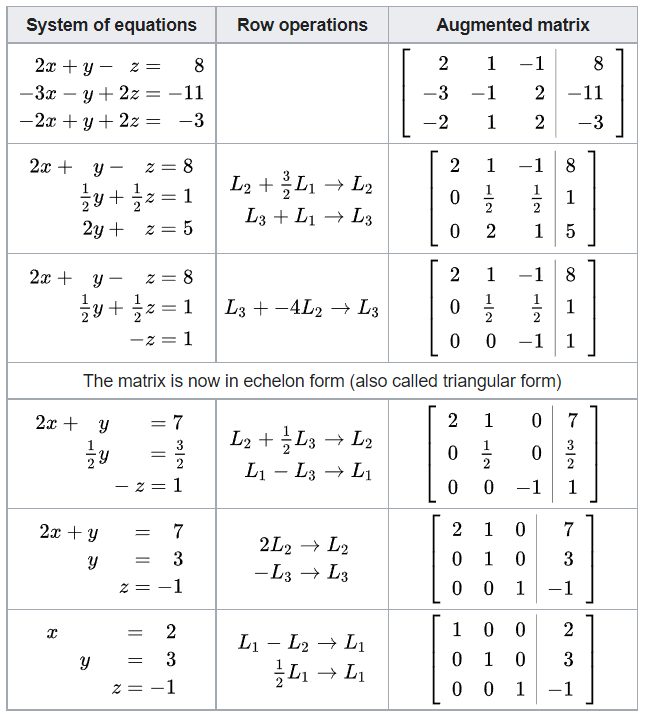

In [ ]:
import urllib.request
from IPython.display import Image, display

urllib.request.urlretrieve(
  'https://raw.githubusercontent.com/profandresg/pyzero/main/gaussianelimination.PNG','gaussianelimination.PNG')
display(Image("gaussianelimination.PNG"))

The previous image is taken from Wikipedia as an example of Gaussian Elimination. Let's replicate the operations using Python

In [ ]:
import numpy as np

A=(np.array([[2,1,-1],
       [-3,-1,2],
       [-2,1,2]])).astype(float)
B=(np.array([[8],
       [-11],
       [-3]])).astype(float)

print(A.shape)
print(B.shape)


#Let's create the augmented matrix
a_mat=np.concatenate((A,B),axis=1)
print(a_mat)

#Let's do Gaussian elimination
a_mat[1,:]=a_mat[1,:]+(3/2)*a_mat[0,:]
a_mat[2,:]=a_mat[2,:]+a_mat[0,:]
print(a_mat, '\n')

a_mat[2,:]=a_mat[2,:]+(-4*a_mat[1,:])
print(a_mat, '\n')

a_mat[1,:]=a_mat[1,:]+(1/2)*a_mat[2,:]
a_mat[0,:]=a_mat[0,:]-a_mat[2,:]
print(a_mat, '\n')

a_mat[1,:]=2*a_mat[1,:]
a_mat[2,:]=-a_mat[2,:]
print(a_mat, '\n')

a_mat[0,:]=a_mat[0,:]-a_mat[1,:]
a_mat[0,:]=(1/2)*a_mat[0,:]
print(a_mat, '\n')

x=a_mat[:,-1]
print('the solution is: \n')
print(x)


#Alternatively, we could do it like this:
x = np.linalg.solve(A,B)
print('the solution is: \n')
print(x)



(3, 3)
(3, 1)
[[  2.   1.  -1.   8.]
 [ -3.  -1.   2. -11.]
 [ -2.   1.   2.  -3.]]
[[ 2.   1.  -1.   8. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   2.   1.   5. ]] 

[[ 2.   1.  -1.   8. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   0.  -1.   1. ]] 

[[ 2.   1.   0.   7. ]
 [ 0.   0.5  0.   1.5]
 [ 0.   0.  -1.   1. ]] 

[[ 2.  1.  0.  7.]
 [ 0.  1.  0.  3.]
 [-0. -0.  1. -1.]] 

[[ 1.  0.  0.  2.]
 [ 0.  1.  0.  3.]
 [-0. -0.  1. -1.]] 

the solution is: 

[ 2.  3. -1.]
the solution is: 

[[ 2.]
 [ 3.]
 [-1.]]


#The Inverse Matrix

A n n-by-n square matrix $A$ is called invertible if there exists an n-by-n square matrix $B$ such that 
$AB =BA =I_n$ 

where $I_n$ denotes the n-by-n identity matrix and the multiplication used is ordinary matrix multiplication. If this is the case, then the matrix $B$ is uniquely determined by $A$, and is called the (multiplicative) inverse of $A$, denoted by $A^{−1}$. Matrix inversion is the process of finding the matrix $B$ that satisfies the prior equation for a given invertible matrix $A$.

A square matrix that is not invertible is called singular or degenerate. A square matrix is singular if and only if its determinant is zero. Singular matrices are rare in the sense that if a square matrix's entries are randomly selected from any finite region on the number line or complex plane, the probability that the matrix is singular is 0, that is, it will "almost never" be singular. Non-square matrices (m-by-n matrices for which m ≠ n) do not have an inverse. 

In [ ]:
#we can solve the system of equations to find B such that AB=I

A=(np.array([[1,1,3],
             [1,2,4],
             [1,1,2]])).astype(float)
I=(np.array([[1,0,0],
             [0,1,0],
             [0,0,1]])).astype(float)

B = np.linalg.solve(A,I)
print('the inverse matrix B is: \n')
print(B)


print('the inverse matrix B is: \n')
print(np.linalg.inv(A))

 


the inverse matrix B is: 

[[ 0. -1.  2.]
 [-2.  1.  1.]
 [ 1. -0. -1.]]
the inverse matrix B is: 

[[ 0. -1.  2.]
 [-2.  1.  1.]
 [ 1. -0. -1.]]


#Determinants and inverses

The determinant of a matrix A is denoted det(A), det A, or |A|. It is a scalar value that is a function of the entries of a square matrix. 

It allows characterizing some properties of the matrix and the linear map represented by the matrix. 

The determinant is nonzero if and only if the matrix is invertible.

Let´s suppose we have our basis vectors 

\begin{align}
e_1 =
\begin{bmatrix}
  1\\
  0
\end{bmatrix}
\qquad
e2 =
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\qquad
\end{align}

and we want to apply a transformation given by the matrix

\begin{align}
A =
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
\end{align}

[1 0] [0 1]
[0.5 2. ] [1.5 1.2]


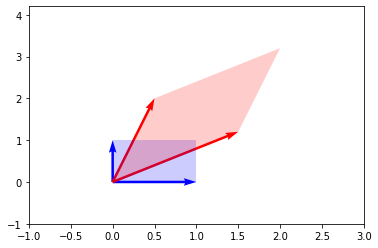

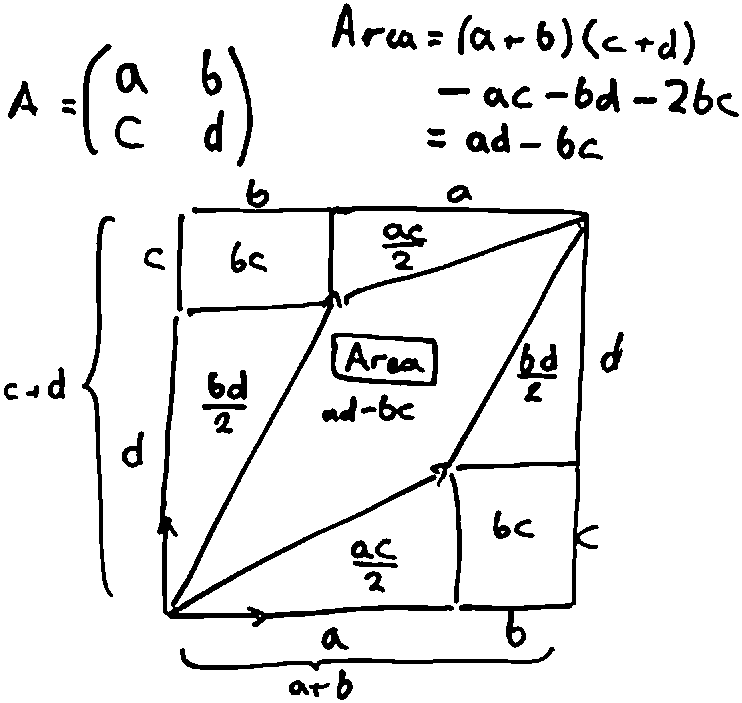

In [ ]:
import matplotlib.pyplot as plt
def plot_un_sq(e0,e1,e2,e1n,e2n,mycolor):
  e3=e1+e2
  un_sq=np.array([e0,e1,e2,e3])
  vectors_rn = np.array([[*e0, *e1],
                      [*e0, *e2]])
  X0, Y0, Xf, Yf = zip(*vectors_rn)
  ax = plt.gca()
  x_lim=[un_sq.min(axis=0)[0]-1, un_sq.max(axis=0)[0]+1]
  y_lim=[un_sq.min(axis=0)[1]-1, un_sq.max(axis=0)[1]+1]
#  print(x_lim); print(y_lim)
  
  ax.quiver(X0, Y0, Xf, Yf, angles='xy', scale_units='xy',
          color=[mycolor,mycolor],scale=1)
  #ax.annotate(e1n + f'({e1[0]},{e1[1]})', (e1[0],e1[1]),fontsize=14)
  #ax.annotate(e2n + f'({e2[0]},{e2[1]})', (e2[0],e2[1]),fontsize=14)
  bx1=[e0[0],e1[0],e3[0]]
  bx2=[e0[0],e2[0],e3[0]]
  by1=[e0[1],e1[1],e3[1]]
  by2=[e0[1],e2[1],e3[1]]
  plt.fill(
    np.append(bx1, bx2[::-1]),
    np.append(by1, by2[::-1]), 
    mycolor, alpha=0.2)
  ax.set_xlim(x_lim);ax.set_ylim(y_lim)


plt.figure(); 
e0=[0,0]; e1=np.array([1,0]); e2=np.array([0,1])
e3=e1+e2
e1n='e1'; e2n='e2'
mycolor='b'
plot_un_sq(e0,e1,e2,e1n,e2n,mycolor)


a=0.5; b=1.5; c=2; d=1.2
b0=e0
tm=np.array([[a,b],
             [c,d]])
b1=tm.dot(e1)      
b2=tm.dot(e2)
b3=b1+b2
b1n='b1'; b2n='b2'
mycolor='r'
plot_un_sq(b0,b1,b2,b1n,b2n,mycolor)
print(e1,e2)
print(b1,b2)
plt.show()

urllib.request.urlretrieve(
  'https://raw.githubusercontent.com/profandresg/pyzero/main/areadeterminant.png','areadeterminant.png')
display(Image("areadeterminant.png", width=400, height=400))



$\text{Area}=ad-bc$ 
Is the determinant of matrix $A$, and it is a scaling factor of the transformed basis.

Going back to our matrix:
\begin{align}
A =
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
\end{align}

if we want to calculate its inverse, we can do it as:

\begin{align}
A^{-1} =\frac{1}{|A|}
\begin{bmatrix}
d & -b \\
-c & a \\
\end{bmatrix}
=\frac{1}{ad-bc}
\begin{bmatrix}
d & -b \\
-c & a \\
\end{bmatrix}
\end{align}



Let's see now what happens if the tranformation matrix is:
\begin{align}
A =
\begin{bmatrix}
1 & 2 \\
1 & 2 \\
\end{bmatrix}
\end{align}


[1 0] [0 1]
[1 1] [2 2]


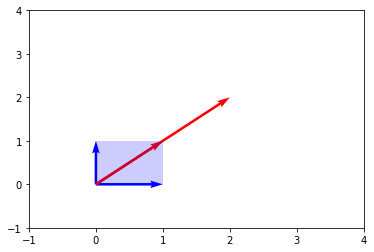

The determinant of A is: 
0.0


In [ ]:
plt.figure(); 
e0=[0,0]; e1=np.array([1,0]); e2=np.array([0,1])
e3=e1+e2
e1n='e1'; e2n='e2'
mycolor='b'
plot_un_sq(e0,e1,e2,e1n,e2n,mycolor)


a=1; b=2; c=1; d=2
b0=e0
tm=np.array([[a,b],
             [c,d]])
b1=tm.dot(e1)      
b2=tm.dot(e2)
b3=b1+b2
b1n='b1'; b2n='b2'
mycolor='r'
plot_un_sq(b0,b1,b2,b1n,b2n,mycolor)
print(e1,e2)
print(b1,b2)
plt.show()

print('The determinant of A is: ')
print(np.linalg.det(tm))


Let's check now another matrix:
\begin{align}
A =
\begin{bmatrix}
1 & 1 & 3\\
1 & 2 & 4\\
2 & 3 & 7\\
\end{bmatrix}
\end{align}

In [ ]:
A=np.array([[1,1,3],
            [1,2,4],
            [2,3,7]])
print('The determinant of A is: ')
print(np.linalg.det(A))

The determinant of A is: 
0.0


The inverse matrix lets me undo my transformation, but if there is no inverse there is no way of undoing it.

#Rank of a Matrix
The rank of a matrix A is the dimension of the vector space generated (or spanned) by its columns.This corresponds to the maximal number of linearly independent columns of A. Rank is thus a measure of the "nondegenerateness" of the system of linear equations and linear transformation encoded by A.

In [ ]:
C = np.array([[1, 2, 3],
              [4, 5, 6]])

rank=np.linalg.matrix_rank(C)

print("el rango de C = ",rank)

el rango de C =  2


#Orthogonal matrices

An orthogonal matrix, or orthonormal matrix, is a real square matrix whose columns and rows are orthonormal vectors.

$Q^{T}Q=QQ^{T}=I$

where $Q^T$ is the transpose of $Q$ and $I$ is the identity matrix. Therefore, a matrix $Q$ is orthogonal if its transpose is equal to its inverse:
$Q^T=Q^{-1}$ where $Q^{−1}$ is the inverse of $Q$.

In [ ]:
A=1/7*np.array([[3,2,6],
            [-6,3,2],
            [2,6,-3]])
A_I=np.linalg.inv(A)
A_T=A.transpose()
print(A_I)
print(A_T)

A=np.array([[np.cos(np.pi/3),np.sin(np.pi/3)],
            [-np.sin(np.pi/3),np.cos(np.pi/3)]])
A_I=np.linalg.inv(A)
A_T=A.transpose()
print(A_I)
print(A_T)


A=np.array([[0,0,0,1],
            [0,0,1,0],
            [1,0,0,0],
            [0,1,0,0]])
A_I=np.linalg.inv(A)
A_T=A.transpose()
print(A_I)
print(A_T)

            

[[ 0.42857143 -0.85714286  0.28571429]
 [ 0.28571429  0.42857143  0.85714286]
 [ 0.85714286  0.28571429 -0.42857143]]
[[ 0.42857143 -0.85714286  0.28571429]
 [ 0.28571429  0.42857143  0.85714286]
 [ 0.85714286  0.28571429 -0.42857143]]
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]]


#QR Decomposition

QR decomposition technique decomposes a square or rectangular matrix, which we will denote as $A$, into two components, $Q$, and $R$.

$A=QR$

Where $Q$ is an orthogonal matrix, and $R$ is an upper triangular matrix. QR decomposition is often used in linear least squares estimation 

Consider the matrix A:

\begin{align}
A =
\begin{bmatrix}
2 & -2 & 18 \\
2 & 1 & 0 \\
1 & 2 & 0 \\
\end{bmatrix}
\end{align}

We would like to orthogonalize it by computing Q in the QR decomposition.



In [ ]:
A=np.array([[2,-2,18],
                [2,1,0],
                [1,2,0]])
A_I=np.linalg.inv(A)
A_T=A.transpose()
print(A_I)
print(A_T)

Q, R = np.linalg.qr(A)
Q_I=np.linalg.inv(Q)
Q_T=Q.transpose()
print(Q_I)
print(Q_T)


[[ 0.          0.66666667 -0.33333333]
 [ 0.         -0.33333333  0.66666667]
 [ 0.05555556 -0.11111111  0.11111111]]
[[ 2  2  1]
 [-2  1  2]
 [18  0  0]]
[[-0.66666667 -0.66666667 -0.33333333]
 [ 0.66666667 -0.33333333 -0.66666667]
 [ 0.33333333 -0.66666667  0.66666667]]
[[-0.66666667 -0.66666667 -0.33333333]
 [ 0.66666667 -0.33333333 -0.66666667]
 [ 0.33333333 -0.66666667  0.66666667]]


#Eigenvalues and eigenvectors

An eigenvector or characteristic vector of a linear transformation (a matrix) is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue, often denoted by $\lambda$ , is the factor by which the eigenvector is scaled.

Geometrically, an eigenvector, corresponding to a real nonzero eigenvalue, points in a direction in which it is stretched by the transformation and the eigenvalue is the factor by which it is stretched. If the eigenvalue is negative, the direction is reversed.Loosely speaking, in a multidimensional vector space, the eigenvector is not rotated (therefore, finding the eigenvector means finding the axis of rotation)

[1 0] [0 1]
[1. 0.] [1.25 1.  ]
Valores Propios =  [1. 1.]

 Vectores Propios = 
 [[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.77635684e-16]]
[1 0] [0 1]
[-1  0] [0 1]
Valores Propios =  [-1.  1.]

 Vectores Propios = 
 [[1. 0.]
 [0. 1.]]
[1 0] [0 1]
[1.5 0. ] [0.         0.66666667]
Valores Propios =  [1.5        0.66666667]

 Vectores Propios = 
 [[1. 0.]
 [0. 1.]]
[1 0] [0 1]
[0.5 2. ] [1.5 1.2]
Valores Propios =  [-0.9170597  2.6170597]

 Vectores Propios = 
 [[-0.72691807 -0.57812411]
 [ 0.6867242  -0.81594884]]


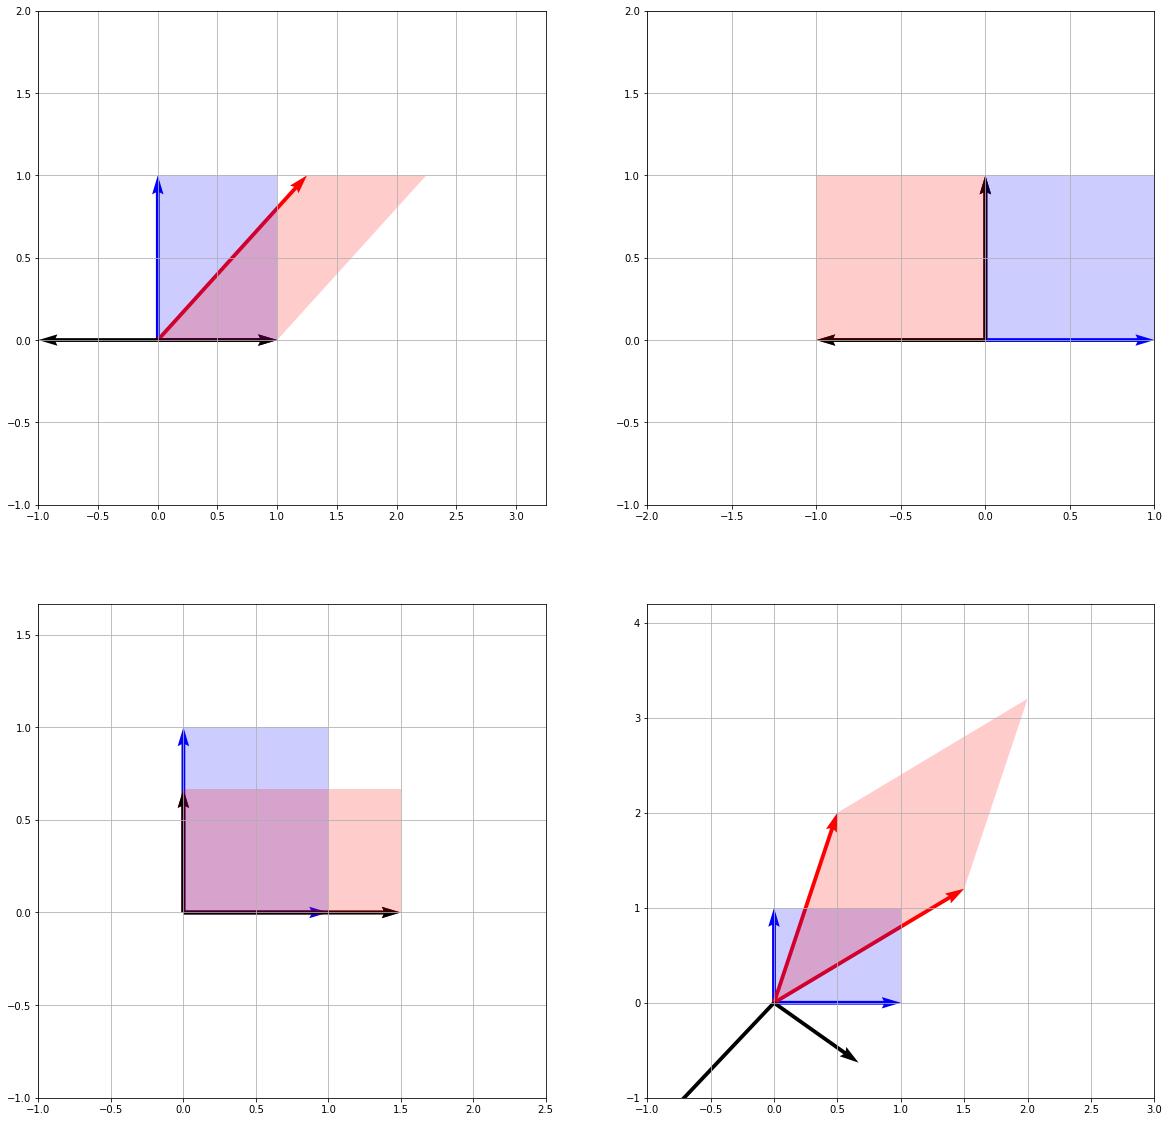

In [ ]:
plt.figure(1, figsize=(20 ,20))
plt.subplot(221)
e0=[0,0]; e1=np.array([1,0]); e2=np.array([0,1])
e3=e1+e2
e1n='e1'; e2n='e2'
mycolor='b'
plot_un_sq(e0,e1,e2,e1n,e2n,mycolor)


b0=e0
tm=np.array([[1,1.25],
            [0,1]])
b1=tm.dot(e1); b2=tm.dot(e2); b3=b1+b2; b1n='b1'; b2n='b2';mycolor='r'
plot_un_sq(b0,b1,b2,b1n,b2n,mycolor)
print(e1,e2);print(b1,b2)
eigenvalues, eigenvectors = np.linalg.eig(tm)
print("Valores Propios = ",eigenvalues)
print("\n","Vectores Propios = \n",eigenvectors)
u0=eigenvalues[0]*eigenvectors[:,0]
u1=eigenvalues[1]*eigenvectors[:,1]
array = np.array([[0, 0, *u0], 
                 [0, 0, *u1]])
X0, Y0, Xf, Yf = zip(*array)
ax = plt.gca(); ax.quiver(X0, Y0, Xf, Yf, angles='xy', scale_units='xy',
          color=['k','k'],scale=1)
plt.grid();plt.draw();


ax=plt.subplot(222)
mycolor='b'
plot_un_sq(e0,e1,e2,e1n,e2n,mycolor)
tm=np.array([[-1,0],
            [0,1]])
b1=tm.dot(e1); b2=tm.dot(e2); b3=b1+b2; b1n='b1'; b2n='b2';mycolor='r'
plot_un_sq(b0,b1,b2,b1n,b2n,mycolor)
print(e1,e2);print(b1,b2)
eigenvalues, eigenvectors = np.linalg.eig(tm)
print("Valores Propios = ",eigenvalues)
print("\n","Vectores Propios = \n",eigenvectors)
u0=eigenvalues[0]*eigenvectors[:,0]
u1=eigenvalues[1]*eigenvectors[:,1]
array = np.array([[0, 0, *u0], 
                 [0, 0, *u1]])
X0, Y0, Xf, Yf = zip(*array)
ax = plt.gca(); ax.quiver(X0, Y0, Xf, Yf, angles='xy', scale_units='xy',
          color=['k','k'],scale=1)
plt.grid();plt.draw();

plt.subplot(223)
mycolor='b'
plot_un_sq(e0,e1,e2,e1n,e2n,mycolor)
tm=np.array([[3/2,0],
            [0,2/3]])
b1=tm.dot(e1); b2=tm.dot(e2); b3=b1+b2; b1n='b1'; b2n='b2';mycolor='r'
plot_un_sq(b0,b1,b2,b1n,b2n,mycolor)
print(e1,e2);print(b1,b2)
eigenvalues, eigenvectors = np.linalg.eig(tm)
print("Valores Propios = ",eigenvalues)
print("\n","Vectores Propios = \n",eigenvectors)
u0=eigenvalues[0]*eigenvectors[:,0]
u1=eigenvalues[1]*eigenvectors[:,1]
array = np.array([[0, 0, *u0], 
                 [0, 0, *u1]])
X0, Y0, Xf, Yf = zip(*array)
ax = plt.gca(); ax.quiver(X0, Y0, Xf, Yf, angles='xy', scale_units='xy',
          color=['k','k'],scale=1)
plt.grid();plt.draw();

plt.subplot(224)
mycolor='b'
plot_un_sq(e0,e1,e2,e1n,e2n,mycolor)
a=0.5; b=1.5; c=2; d=1.2
tm=np.array([[a,b],
             [c,d]])
b1=tm.dot(e1); b2=tm.dot(e2); b3=b1+b2; b1n='b1'; b2n='b2';mycolor='r'
plot_un_sq(b0,b1,b2,b1n,b2n,mycolor)
print(e1,e2);print(b1,b2)
eigenvalues, eigenvectors = np.linalg.eig(tm)
print("Valores Propios = ",eigenvalues)
print("\n","Vectores Propios = \n",eigenvectors)
u0=eigenvalues[0]*eigenvectors[:,0]
u1=eigenvalues[1]*eigenvectors[:,1]
array = np.array([[0, 0, *u0], 
                 [0, 0, *u1]])
X0, Y0, Xf, Yf = zip(*array)
ax = plt.gca(); ax.quiver(X0, Y0, Xf, Yf, angles='xy', scale_units='xy',
          color=['k','k'],scale=1)
plt.grid();plt.draw();
plt.show()



#Eigenbasis decomposition

##Why is the Eigendecomposition Useful?
Matrix operations such as transformations or multiplications are computationally expensive. In applications such as machine learning, you often have thousands or millions of dimensions. Operations are much simpler on diagonal matrices. So if we can decompose a matrix into a diagonal form before we apply any costly operation, it makes things easier and faster.

##How the Eigendecomposition Works
For an eigenvector, multiplication with the transformation matrix A, is equivalent to multiplying with a simple scalar λ. Most matrices can be decomposed into a matrix of column eigenvectors P and a diagonal matrix D that is filled with eigenvalues on the main diagonal. When we multiply P and D, each column (each eigenvector) would be multiplied with the corresponding scalar (each eigenvalue).

\begin{align}
P = 
    \begin{bmatrix}
           v_{11} & v_{21}\\
           v_{12} & v_{22}\\
    \end{bmatrix}
    \qquad
    D = \begin{bmatrix}
           \lambda_{1} & 0\\
           0 & \lambda_{2}\\
    \end{bmatrix}
 \end{align}

You can use the eigenvector-matrix P to transform a vector to the eigenbasis. Now you can apply the transformation using the much simpler diagonal matrix D. Afterwards; you transform back to your original basis using the inverse of P.

$A=PDP^{-1}$

If you have to do it several times:

$AA=A^2=PDP^{-1}PDP^{-1}=PDIDP^{-1}=PD^{2}P^{-1}$





In [ ]:
A=np.array([[2.0,1.0],
            [1.0,2.0]])
D, P = np.linalg.eig(A)
D=D*np.identity(2)
print(A)
print(D)
print(P)
print(np.dot(np.dot(P,D),np.linalg.inv(P)))


print(np.linalg.matrix_power(A,2))
print(np.dot(np.dot(P,np.linalg.matrix_power(D,2)),np.linalg.inv(P)))




[[2. 1.]
 [1. 2.]]
[[3. 0.]
 [0. 1.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[2. 1.]
 [1. 2.]]
[[5. 4.]
 [4. 5.]]
[[5. 4.]
 [4. 5.]]


[9. 1.]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[9.31322575e-10 9.31322575e-10]
 [9.31322575e-10 9.31322575e-10]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0.00390625 0.00390625]
 [0.00390625 0.00390625]]
[[0.015625 0.015625]
 [0.015625 0.015625]]
[[0. 0.]
 [0. 0.]]
[[0.125 0.125]
 [0.125 0.125]]
[[0. 0.]
 [0. 0.]]
[[1. 0.]
 [0. 1.]]
[[4. 0.]
 [0. 4.]]
[[-16. -16.]
 [-16.   0.]]
[[0. 0.]
 [0. 0.]]
[[128.   0.]
 [128.   0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[-2048.     0.]
 [-2048.     0.]]
[[0. 0.]
 [0. 0.]]
[[    0.     0.]
 [32768. 32768.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:664: RuntimeWarning: overflow encountered in matmul
  result = z if result is None else fmatmul(result, z)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]


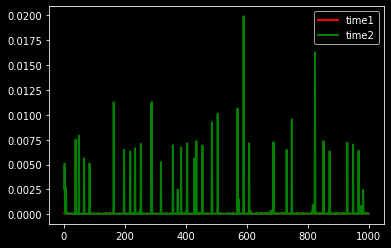

In [ ]:
import time

A=np.array([[2.0,1.0],
            [1.0,2.0]])
Dv, P = np.linalg.eig(A)
I=np.identity(2)
D=Dv*I
Pinv=np.linalg.inv(P)
print(Dv**2)

time1=[]
time2=[]
x=[*range(2,1000+1)]
for n in x:
  
  comienzo=time.time()
  pow_A_n1=np.linalg.matrix_power(A,n)
  final=time.time()
  time1.append(final-comienzo)

  comienzo=time.time()
  expo = Dv**n*I
  P_inv = np.linalg.inv(P)
  p1_expresion = P.dot(expo)
#  pow_A_n2=(p1_expresion.dot(P_inv))
  pow_A_n2=(np.dot(p1_expresion,P_inv))
  final=time.time()
  time2.append(final-comienzo)

  print(pow_A_n1-pow_A_n2)
print(('el tiempo promedio 1 es:',sum(time1)/len(time1),'el tiempo promedio 2 es:',sum(time2)/len(time2)))

with plt.style.context('dark_background'):
    plt.rcParams['lines.linewidth'] = 2
    plt.plot(x,time1,'r', label='time1')
    plt.plot(x,time2,'g', label='time2')
    plt.legend()
plt.show()




In [ ]:
valor = 1
(np.array([[1,2,3,4],[1,2,3,4]])).dot(valor)
print(np.array(time2).shape)
print(np.array(time2))

(9,)
[8.58306885e-05 6.48260117e-04 1.08480453e-04 4.96220589e-03
 8.32080841e-05 6.19888306e-05 7.53402710e-05 6.24656677e-05
 5.72204590e-05]


In [ ]:
print(time2)
print(sum(time2)/len(time2))

[5.53131103515625e-05, 3.8623809814453125e-05, 3.4332275390625e-05, 2.8371810913085938e-05, 0.00386810302734375, 2.9802322387695312e-05, 2.0265579223632812e-05, 2.1457672119140625e-05, 4.4345855712890625e-05]
0.0004600683848063151


In [ ]:
timepo_history1 = np.array([])
timepo_history2 = np.array([])
timepo_history1 = np.append()

#Solving linear regression using matrices

To build linear regression we will use the classic cars data from cmdlinetips.com‘s github page. This cars dataset contains distance needed for cars at different speeds to stop from 1920 cars. 
Let us name the two columns with two variable names X and Y, where X is the predictor variable. With linear regression model, we fit our observed data using the linear model shown below and estimate the parameters of the linear model.

$Y=\beta_0 + \beta1X+ \epsilon$

Here beta_0 and beta_1 are intercept and slope of the linear equation. We can combine the predictor variables together as matrix. In our example we have one predictor variable. So we create a matrix with ones as first column and X.

The parameter estimates are:

$\hat{\beta}=(X^T.X)^{-1}.X^T.Y$

   speed  dist
0      4     2
1      4    10
2      7     4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Distances taken to stop (feet)')

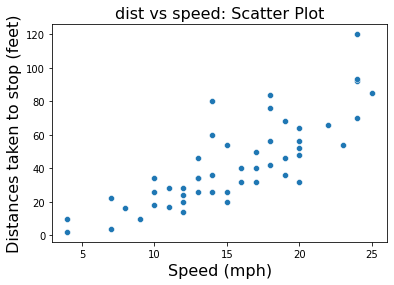

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

data_url = 'https://raw.githubusercontent.com/cmdlinetips/data/master/cars.tsv'
cars = pd.read_csv(data_url, sep="\t")

print(cars.head(n=3))

bplot= sns.scatterplot('speed','dist',data=cars)
bplot.axes.set_title("dist vs speed: Scatter Plot",
                    fontsize=16)
bplot.set_xlabel("Speed (mph)", 
                fontsize=16)
bplot.set_ylabel("Distances taken to stop (feet)", 
                fontsize=16)



[[ 1.  4.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 10.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 12.]
 [ 1. 12.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 13.]
 [ 1. 13.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 14.]
 [ 1. 14.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 15.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 17.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 18.]
 [ 1. 18.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 19.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 20.]
 [ 1. 20.]
 [ 1. 20.]
 [ 1. 20.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 24.]
 [ 1. 24.]
 [ 1. 24.]
 [ 1. 25.]]
[-17.57909489   3.93240876]


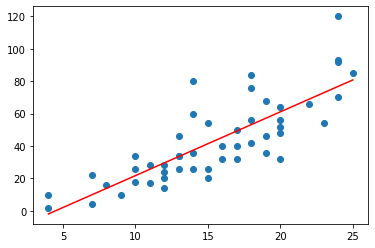

In [ ]:

X = cars.speed.values
Y = cars.dist.values
	
X_mat=np.vstack((np.ones(len(X)), X)).T
print(X_mat)
	
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

print(beta_hat)

# predict using coefficients
yhat = X_mat.dot(beta_hat)

# plot data and predictions
plt.scatter(X, Y)
plt.plot(X, yhat, color='red')
